DATA CLEANING

1. Load data

In [75]:
# import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [76]:
def read_data(fname):
  # read dataset
  df = pd.read_csv(fname)
  # count duplicates
  dup = df['url'].duplicated().sum()
  # drop duplicates
  df_= df.drop_duplicates(subset='url', keep='last')
  # set url as index
  df_.set_index('url', inplace=True)

  # drop column title, address, district, ads_id
  df_ = df_.drop(['title', 'address', 'district', 'ads_id', 'property_type'], axis=1)

  print(f"Data shape raw            : {df.shape}")
  print(f"Number of duplicate url   : {dup}")
  print(f"Data shape after dropping : {df_.shape}")

  return df_

In [78]:
data = read_data(fname='jabodetabek_house_price.csv')

Data shape raw            : (3553, 27)
Number of duplicate url   : 1
Data shape after dropping : (3552, 21)


In [79]:
data

,price_in_rp,city,lat,long,facilities,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
url,,,,,,,,,,,,,,,,,,,,,
https://www.rumah123.com/properti/bekasi/hos11360272/#qid~213b5619-a399-47b3-bfcf-faaef6b542d5,2.990000e+09,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",4.0,4.0,239.0,272.0,0.0,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
https://www.rumah123.com/properti/bekasi/hos10680347/#qid~748f5d2d-8d3a-4a4e-a1b4-37c7be7ffc25,1.270000e+09,Bekasi,-6.223945,106.986275,Taman,3.0,2.0,55.0,69.0,1.0,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
https://www.rumah123.com/properti/bekasi/hos10685867/#qid~f6c2cf9d-44fa-4c1a-8749-8ee96b116e93,1.950000e+09,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",3.0,3.0,119.0,131.0,1.0,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
https://www.rumah123.com/properti/bekasi/hos10927790/#qid~f6c2cf9d-44fa-4c1a-8749-8ee96b116e93,3.300000e+09,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",3.0,3.0,180.0,174.0,0.0,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
https://www.rumah123.com/properti/bekasi/hos10785530/#qid~1807f915-9393-4e9c-a6d6-eb3d73117a15,4.500000e+09,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",4.0,3.0,328.0,196.0,2.0,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.rumah123.com/properti/tangerang/hos11361759/#qid~9b7c3e11-2c18-4559-a637-16b29b361aad,5.880000e+08,Tangerang,-6.296615,106.704601,"Masjid, Taman, Tempat Jemuran, Keamanan 24 ja...",2.0,1.0,72.0,36.0,1.0,...,1300 mah,0.0,0.0,1.0,0.0,2022.0,baru,NaN,1.0,furnished
https://www.rumah123.com/properti/tangerang/hos11359615/#qid~0d9492e8-7326-465d-85ee-e54559fedc26,7.850000e+08,Tangerang,-6.283454,106.638775,"Masjid, Keamanan, Jogging Track, Taman, Tem...",3.0,2.0,85.0,60.0,1.0,...,1300 mah,0.0,0.0,2.0,0.0,2022.0,baru,utara,0.0,unfurnished
https://www.rumah123.com/properti/tangerang/hos11359594/#qid~0d9492e8-7326-465d-85ee-e54559fedc26,7.550000e+08,Tangerang,-6.283454,106.638775,"Keamanan, Taman, Jogging Track, Tempat Jemur...",3.0,2.0,78.0,60.0,1.0,...,1300 mah,0.0,0.0,2.0,0.0,2022.0,baru,utara,0.0,unfurnished


DATA CLEANING

In [80]:
# check missing value
100 * (data.isna().sum(0) / len(data))

price_in_rp              0.000000
city                     0.000000
lat                      0.000000
long                     0.000000
facilities               0.000000
bedrooms                 0.929054
bathrooms                0.788288
land_size_m2             0.028153
building_size_m2         0.028153
carports                 0.000000
certificate              3.941441
electricity              0.000000
maid_bedrooms            0.000000
maid_bathrooms           0.000000
floors                   0.140766
building_age            40.653153
year_built              40.653153
property_condition       6.897523
building_orientation    46.340090
garages                  0.000000
furnishing              10.867117
dtype: float64

In [81]:
# drop columns that have > 40% missing value
missing_percentage = 100 * (data.isna().sum() / len(data))
data_cleaned_mv = data.drop(columns=missing_percentage[missing_percentage > 30].index)
data_cleaned_mv.head()

,price_in_rp,city,lat,long,facilities,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,property_condition,garages,furnishing
url,,,,,,,,,,,,,,,,,,
https://www.rumah123.com/properti/bekasi/hos11360272/#qid~213b5619-a399-47b3-bfcf-faaef6b542d5,2.990000e+09,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",4.0,4.0,239.0,272.0,0.0,shm - sertifikat hak milik,4400 mah,0.0,1.0,2.0,bagus,0.0,unfurnished
https://www.rumah123.com/properti/bekasi/hos10680347/#qid~748f5d2d-8d3a-4a4e-a1b4-37c7be7ffc25,1.270000e+09,Bekasi,-6.223945,106.986275,Taman,3.0,2.0,55.0,69.0,1.0,hgb - hak guna bangunan,2200 mah,0.0,0.0,2.0,bagus,0.0,NaN
https://www.rumah123.com/properti/bekasi/hos10685867/#qid~f6c2cf9d-44fa-4c1a-8749-8ee96b116e93,1.950000e+09,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",3.0,3.0,119.0,131.0,1.0,hgb - hak guna bangunan,2200 mah,1.0,1.0,2.0,bagus,1.0,unfurnished
https://www.rumah123.com/properti/bekasi/hos10927790/#qid~f6c2cf9d-44fa-4c1a-8749-8ee96b116e93,3.300000e+09,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",3.0,3.0,180.0,174.0,0.0,shm - sertifikat hak milik,3500 mah,1.0,1.0,2.0,bagus sekali,2.0,unfurnished
https://www.rumah123.com/properti/bekasi/hos10785530/#qid~1807f915-9393-4e9c-a6d6-eb3d73117a15,4.500000e+09,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",4.0,3.0,328.0,196.0,2.0,shm - sertifikat hak milik,3500 mah,1.0,1.0,2.0,bagus,1.0,unfurnished


In [83]:
# drop facilities and electricity (too much unique values)
data_cleaned_ = data_cleaned_mv.drop(columns=['facilities','electricity'])
data_cleaned_.shape

(3552, 16)

In [84]:
data_cleaned_['property_condition'].unique()

array(['bagus', 'bagus sekali', nan, 'baru', 'sudah renovasi',
       'butuh renovasi', 'semi furnished', 'unfurnished'], dtype=object)

In [85]:
# drop rows 'semi furnished' and 'unfurnished' in property_condition (it should be on furnishing columns)
data_cleaned = data_cleaned_[~data_cleaned_['property_condition'].isin(['semi furnished', 'unfurnished'])]
data_cleaned.shape


(3523, 16)

In [86]:
data_cleaned.head()

,price_in_rp,city,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,maid_bedrooms,maid_bathrooms,floors,property_condition,garages,furnishing
url,,,,,,,,,,,,,,,,
https://www.rumah123.com/properti/bekasi/hos11360272/#qid~213b5619-a399-47b3-bfcf-faaef6b542d5,2.990000e+09,Bekasi,-6.223945,106.986275,4.0,4.0,239.0,272.0,0.0,shm - sertifikat hak milik,0.0,1.0,2.0,bagus,0.0,unfurnished
https://www.rumah123.com/properti/bekasi/hos10680347/#qid~748f5d2d-8d3a-4a4e-a1b4-37c7be7ffc25,1.270000e+09,Bekasi,-6.223945,106.986275,3.0,2.0,55.0,69.0,1.0,hgb - hak guna bangunan,0.0,0.0,2.0,bagus,0.0,NaN
https://www.rumah123.com/properti/bekasi/hos10685867/#qid~f6c2cf9d-44fa-4c1a-8749-8ee96b116e93,1.950000e+09,Bekasi,-6.223945,106.986275,3.0,3.0,119.0,131.0,1.0,hgb - hak guna bangunan,1.0,1.0,2.0,bagus,1.0,unfurnished
https://www.rumah123.com/properti/bekasi/hos10927790/#qid~f6c2cf9d-44fa-4c1a-8749-8ee96b116e93,3.300000e+09,Bekasi,-6.223945,106.986275,3.0,3.0,180.0,174.0,0.0,shm - sertifikat hak milik,1.0,1.0,2.0,bagus sekali,2.0,unfurnished
https://www.rumah123.com/properti/bekasi/hos10785530/#qid~1807f915-9393-4e9c-a6d6-eb3d73117a15,4.500000e+09,Bekasi,-6.223945,106.986275,4.0,3.0,328.0,196.0,2.0,shm - sertifikat hak milik,1.0,1.0,2.0,bagus,1.0,unfurnished


DATA PREPROCESSING

1. Split Input Output

In [87]:
def split_input_output(data, target):
  # define input data
  X = input_data = data.drop(target, axis=1)
  # define output
  y = data[target]
  # print
  print(f"X shape : {X.shape}")
  print(f"y shape : {y.shape}")

  return X, y

In [88]:
X, y = split_input_output(data=data_cleaned,
                          target='price_in_rp')

X shape : (3523, 15)
y shape : (3523,)


2. Train Valid Test Split

In [89]:
def split_train_test(X, y, test_size, seed):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size= test_size,
                                                        random_state= seed)
    print(f"X train shape: {X_train.shape}")
    print(f"y train shape: {y_train.shape}")
    print(f"X test shape: {X_test.shape}")
    print(f"y train shape: {y_test.shape}")

    return X_train, X_test, y_train, y_test

In [90]:
X_train, X_not_train, y_train, y_not_train = split_train_test(X, y, 0.2, 123)
X_valid, X_test, y_valid, y_test = split_train_test(X_not_train, y_not_train, 0.5, 123)

X train shape: (2818, 15)
y train shape: (2818,)
X test shape: (705, 15)
y train shape: (705,)
X train shape: (352, 15)
y train shape: (352,)
X test shape: (353, 15)
y train shape: (353,)


In [91]:
print(len(X_train)/len(X))
print(len(X_valid)/len(X))
print(len(X_test)/len(X))

0.7998864604030655
0.09991484530229917
0.10019869429463525


EDA

In [92]:
# check missing value
100 * (X_train.isna().sum(0) / len(X_train))

city                   0.000000
lat                    0.000000
long                   0.000000
bedrooms               1.135557
bathrooms              0.887154
land_size_m2           0.035486
building_size_m2       0.035486
carports               0.000000
certificate            4.009936
maid_bedrooms          0.000000
maid_bathrooms         0.000000
floors                 0.177431
property_condition     7.132718
garages                0.000000
furnishing            10.858765
dtype: float64

In [93]:
num = X_train.select_dtypes(include='number')
cat = X_train.select_dtypes(include='object')


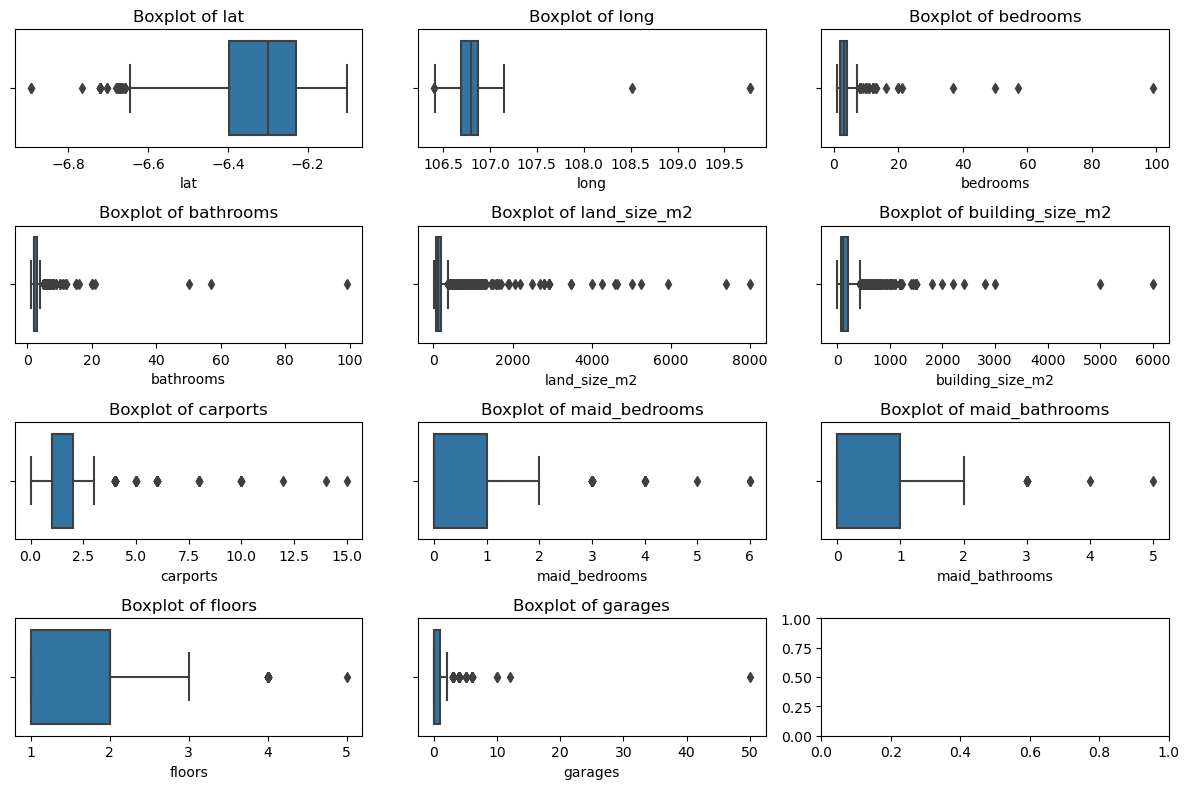

In [94]:
# plot boxplot
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(12, 8))
axes = ax.flatten()

for i, col in enumerate(num.columns):
    sns.boxplot(x=num[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


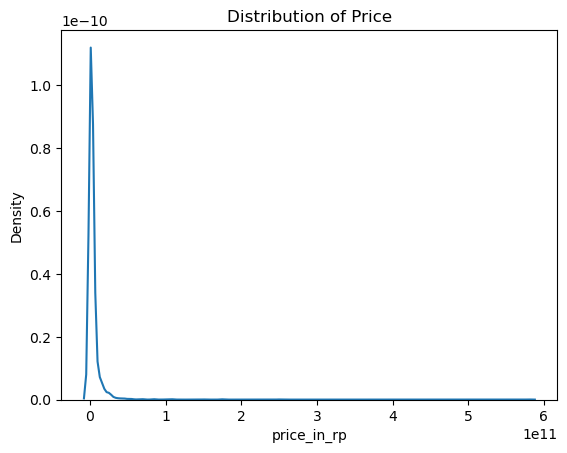

In [95]:
# y (price)
sns.kdeplot(y)
plt.title(f'Distribution of Price')
plt.show()

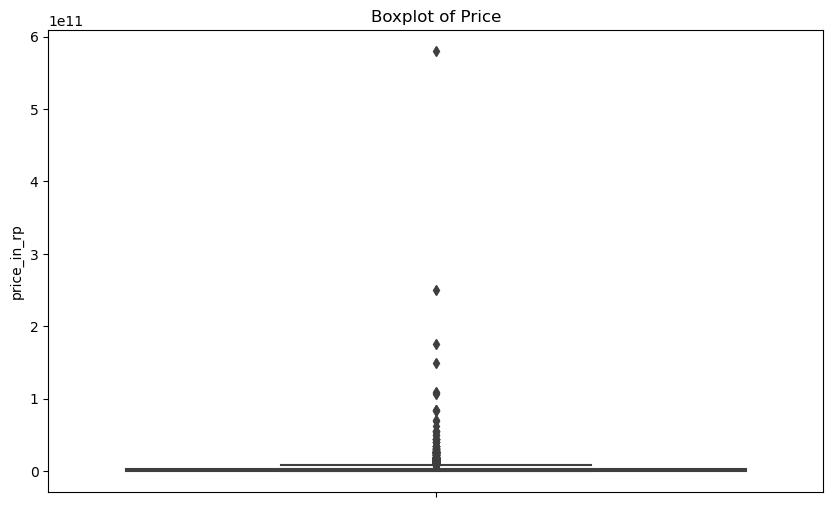

In [96]:
# plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=y_train)
plt.title('Boxplot of Price')
plt.show()

In [97]:
# calculate the lower and upper bounds for price to identify and remove outliers
def detect_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)].index.tolist()

In [98]:
idx_to_drop = []

# detect outliers based on IQR
bedrooms_anomalies = detect_outliers_iqr(X_train, 'bedrooms')
bathrooms_anomalies = detect_outliers_iqr(X_train, 'bathrooms')
maid_bedrooms_anomalies = detect_outliers_iqr(X_train, 'maid_bedrooms')
maid_bathrooms_anomalies = detect_outliers_iqr(X_train, 'maid_bathrooms')
land_anomalies = detect_outliers_iqr(X_train, 'land_size_m2')
building_area_anomalies = detect_outliers_iqr(X_train, 'building_size_m2')
carports_anomalies = detect_outliers_iqr(X_train, 'carports')
garages_anomalies = detect_outliers_iqr(X_train, 'garages')
price_anomalies = detect_outliers_iqr(y_train.to_frame(), y_train.name)

# collect outliers
idx_to_drop = list(set(bedrooms_anomalies + bathrooms_anomalies + maid_bedrooms_anomalies + maid_bathrooms_anomalies \
                       + land_anomalies + building_area_anomalies + carports_anomalies + garages_anomalies + price_anomalies))

percent_to_drop = (len(idx_to_drop) / len(X_train)) * 100
print(f'Number of index to drop:', len(idx_to_drop))
print(f'Number of index to drop: {percent_to_drop:.2f}%')

Number of index to drop: 483
Number of index to drop: 17.14%


we dont use this kind of anomalies detector (using IQR) because it will drop too many rows

In [100]:
idx_to_drop = []
# bedrooms anomaly
bedrooms_anomalies = X_train[X_train['bedrooms']>10].index.tolist()
# bathrooms anomaly
bathrooms_anomalies = X_train[X_train['bathrooms']>10].index.tolist()
# land anomaly
land_anomalies = X_train[X_train['land_size_m2']>2000].index.tolist()
land_anomalies_2 = X_train[X_train['land_size_m2']<30].index.tolist()
# building area anomaly
building_area_anomalies = X_train[X_train['building_size_m2']>1000].index.tolist()
building_area_anomalies_2 = X_train[X_train['building_size_m2']<32].index.tolist()
# carports anomaly
carports_anomalies = X_train[X_train['carports']>5].index.tolist()
# maid bedrooms anomaly
maid_bedrooms_anomalies = X_train[X_train['maid_bedrooms']>2].index.tolist()
# maid bathrooms anomaly
maid_bathrooms_anomalies = X_train[X_train['maid_bathrooms']>2].index.tolist()
# garage anomaly
garage_anomalies = X_train[X_train['garages']>10].index.tolist()
# price anomaly
price_anomalies = y_train[y_train>20_000_000_000].index.tolist()


idx_to_drop = list(set( bedrooms_anomalies + bathrooms_anomalies + maid_bedrooms_anomalies + maid_bathrooms_anomalies \
                       + land_anomalies + land_anomalies_2 + building_area_anomalies + building_area_anomalies_2 + carports_anomalies + price_anomalies))

percent_to_drop = (len(idx_to_drop) / len(X_train)) * 100
print(f'Number of index to drop:', len(idx_to_drop))
print(f'Number of index to drop: {percent_to_drop:.2f}%')

Number of index to drop: 190
Number of index to drop: 6.74%


In [101]:
X_train_clean_eda = X_train.drop(idx_to_drop)
y_train_clean = y_train.drop(idx_to_drop)
print(f"X train clean : {X_train_clean_eda.shape}")
print(f"y train clean : {y_train_clean.shape}")

X train clean : (2628, 15)
y train clean : (2628,)


In [102]:
num_2 = X_train_clean_eda.select_dtypes(include='number')

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
c:\User

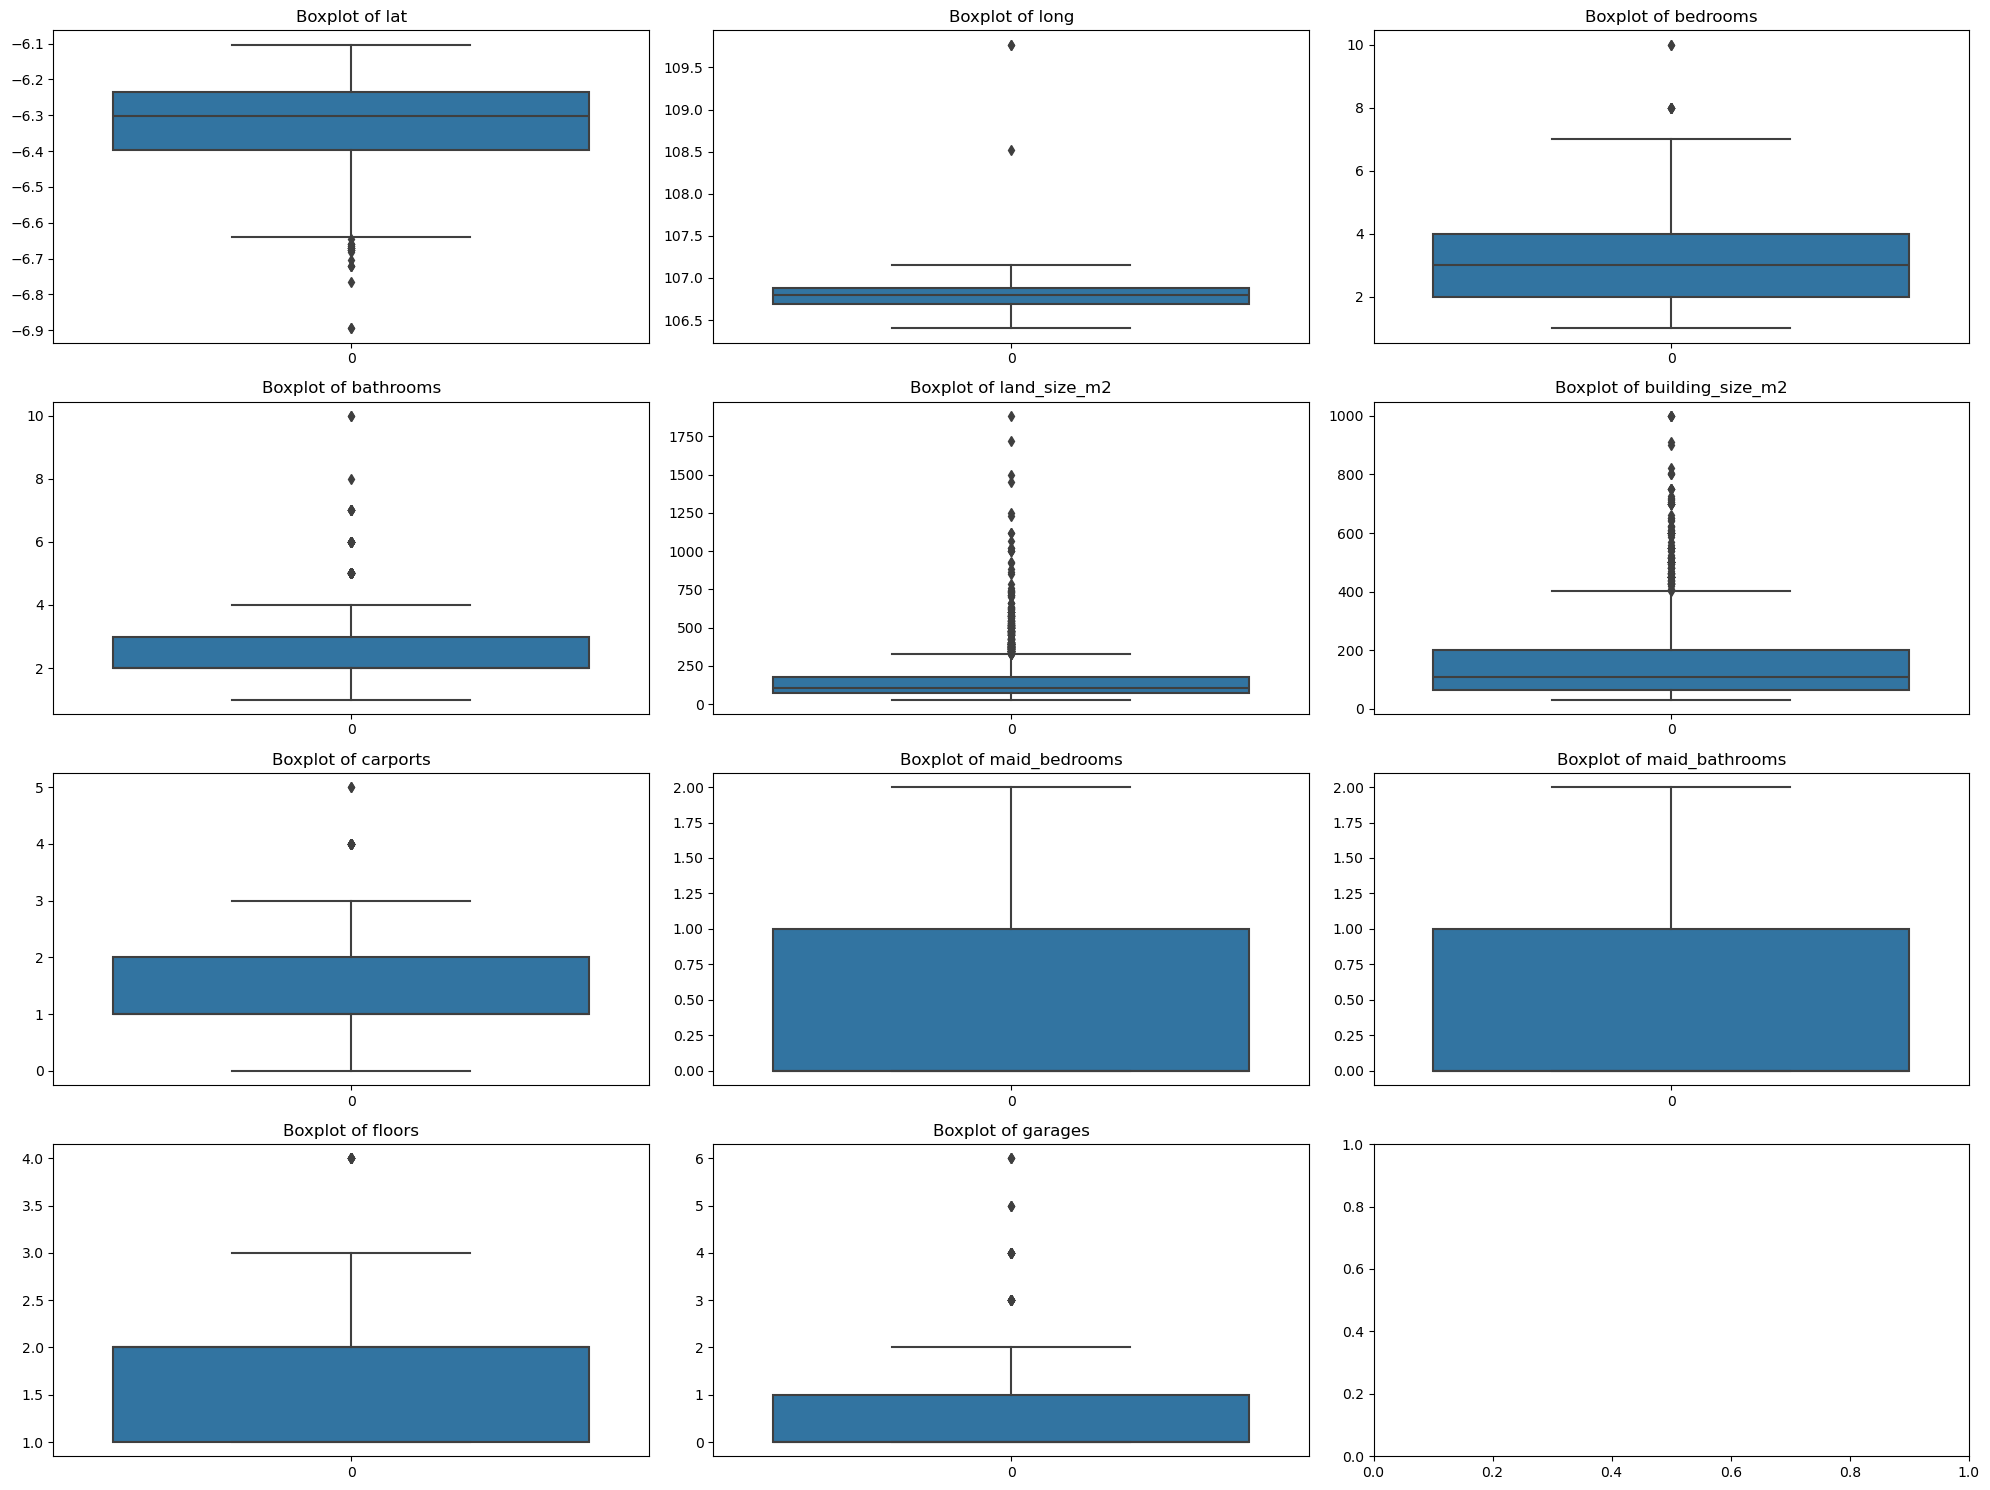

In [103]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
axes = ax.flatten()

for i, col in enumerate(num_2.columns):
    sns.boxplot(num_2[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


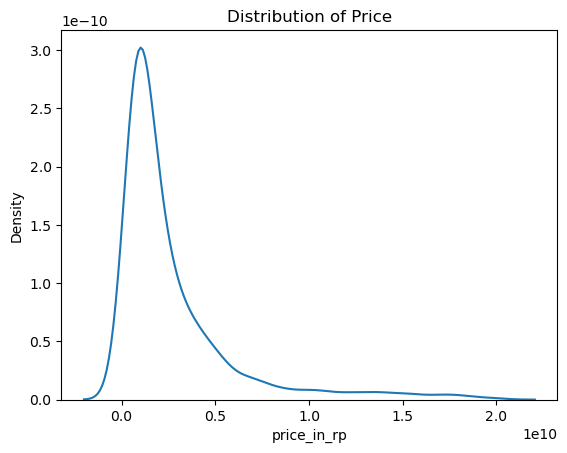

In [104]:
# y (price)
sns.kdeplot(y_train_clean)
plt.title(f'Distribution of Price')
plt.show()

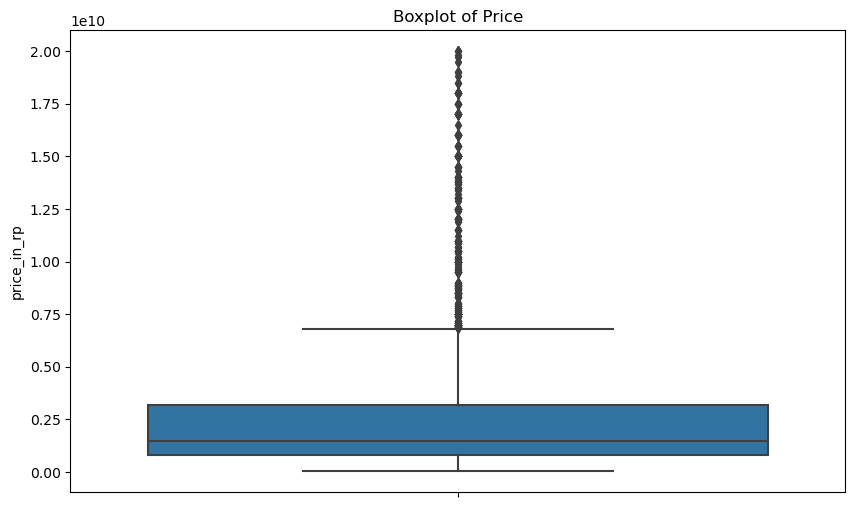

In [105]:
# plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=y_train_clean)
plt.title('Boxplot of Price')
plt.show()

Split numerical and categorical features

In [106]:
num_cols = X_train_clean_eda.select_dtypes(include='number').columns
cat_cols = X_train_clean_eda.select_dtypes(include='object').columns


In [107]:
def split_num_and_cat(data, num_cols, cat_cols):
    num_data = data[num_cols]
    cat_data = data[cat_cols]

    print(f"num data shape : {num_data.shape}")
    print(f"cat data shape : {cat_data.shape}")

    return num_data, cat_data

In [108]:
# split data
X_train_num, X_train_cat = split_num_and_cat(X_train_clean_eda,
                                          num_cols = num_cols,
                                          cat_cols = cat_cols)

num data shape : (2628, 11)
cat data shape : (2628, 4)


In [109]:
X_train_num

,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,garages
url,,,,,,,,,,,
https://www.rumah123.com/properti/bekasi/hos8024375/#qid~9e4aedac-e432-48b8-bf0d-a6ad052759eb,-6.271746,106.930825,4.0,2.0,760.0,350.0,0.0,1.0,1.0,1.0,0.0
https://www.rumah123.com/properti/bogor/hos10966206/#qid~2a6d6b21-35af-4c85-8acd-d480cfa06f0b,-6.387334,106.687295,2.0,1.0,60.0,40.0,1.0,0.0,0.0,1.0,0.0
https://www.rumah123.com/properti/bogor/hos11342048/#qid~b2d78676-f2d8-4857-92e0-0db041e64cd8,-6.518350,106.851279,4.0,4.0,180.0,300.0,2.0,1.0,1.0,2.0,0.0
https://www.rumah123.com/properti/bekasi/hos11222193/#qid~aeb345f5-d0dd-46bf-8173-9872e4274ee2,-6.260760,106.948995,3.0,2.0,160.0,205.0,1.0,1.0,0.0,2.0,0.0
https://www.rumah123.com/properti/bogor/hos11356301/#qid~9ab0b10c-8ceb-4c9a-9e7a-479f91a141d1,-6.518350,106.851279,3.0,2.0,81.0,65.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
https://www.rumah123.com/properti/depok/hos10613220/#qid~84a3f50f-176c-4bc3-9d81-d26066f48a8d,-6.332401,106.790783,3.0,2.0,95.0,105.0,0.0,0.0,0.0,2.0,1.0
https://www.rumah123.com/properti/bogor/hos10967564/#qid~597aa346-d86c-4080-8208-5b78189bc971,-6.572611,106.801102,2.0,2.0,60.0,49.0,0.0,0.0,1.0,2.0,1.0
https://www.rumah123.com/properti/bogor/hos10251211/#qid~e175c33b-d42f-4cad-aed9-00c9c7a2cccb,-6.320143,106.970528,2.0,1.0,90.0,80.0,0.0,0.0,0.0,1.0,0.0


Imputation

a. numerical imputation

In [111]:
# check missing value
100 * ((X_train_num.isna().sum())/ len(X_train_num))

lat                 0.000000
long                0.000000
bedrooms            0.989346
bathrooms           0.875190
land_size_m2        0.038052
building_size_m2    0.038052
carports            0.000000
maid_bedrooms       0.000000
maid_bathrooms      0.000000
floors              0.190259
garages             0.000000
dtype: float64

In [112]:
def num_imputer_fit(data):
    imputer = SimpleImputer(missing_values = np.nan,
                            strategy = 'median')
    num_imputer = imputer.fit(data)

    return imputer

def num_imputer_transform(data, imputer):
    imputed_data = imputer.transform(data)
    imputed_data = pd.DataFrame(imputed_data)
    imputed_data.columns = data.columns
    imputed_data.index = data.index


    return imputed_data

In [113]:
num_imputer = num_imputer_fit(X_train_num)
X_train_num_imputed = num_imputer_transform(X_train_num, num_imputer)
X_train_num_imputed

,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,garages
url,,,,,,,,,,,
https://www.rumah123.com/properti/bekasi/hos8024375/#qid~9e4aedac-e432-48b8-bf0d-a6ad052759eb,-6.271746,106.930825,4.0,2.0,760.0,350.0,0.0,1.0,1.0,1.0,0.0
https://www.rumah123.com/properti/bogor/hos10966206/#qid~2a6d6b21-35af-4c85-8acd-d480cfa06f0b,-6.387334,106.687295,2.0,1.0,60.0,40.0,1.0,0.0,0.0,1.0,0.0
https://www.rumah123.com/properti/bogor/hos11342048/#qid~b2d78676-f2d8-4857-92e0-0db041e64cd8,-6.518350,106.851279,4.0,4.0,180.0,300.0,2.0,1.0,1.0,2.0,0.0
https://www.rumah123.com/properti/bekasi/hos11222193/#qid~aeb345f5-d0dd-46bf-8173-9872e4274ee2,-6.260760,106.948995,3.0,2.0,160.0,205.0,1.0,1.0,0.0,2.0,0.0
https://www.rumah123.com/properti/bogor/hos11356301/#qid~9ab0b10c-8ceb-4c9a-9e7a-479f91a141d1,-6.518350,106.851279,3.0,2.0,81.0,65.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
https://www.rumah123.com/properti/depok/hos10613220/#qid~84a3f50f-176c-4bc3-9d81-d26066f48a8d,-6.332401,106.790783,3.0,2.0,95.0,105.0,0.0,0.0,0.0,2.0,1.0
https://www.rumah123.com/properti/bogor/hos10967564/#qid~597aa346-d86c-4080-8208-5b78189bc971,-6.572611,106.801102,2.0,2.0,60.0,49.0,0.0,0.0,1.0,2.0,1.0
https://www.rumah123.com/properti/bogor/hos10251211/#qid~e175c33b-d42f-4cad-aed9-00c9c7a2cccb,-6.320143,106.970528,2.0,1.0,90.0,80.0,0.0,0.0,0.0,1.0,0.0


In [114]:
# sanity check
(X_train_num_imputed.isna().sum())

lat                 0
long                0
bedrooms            0
bathrooms           0
land_size_m2        0
building_size_m2    0
carports            0
maid_bedrooms       0
maid_bathrooms      0
floors              0
garages             0
dtype: int64

b. categorical imputation

In [115]:
# check missing value
(X_train_cat.isna().sum())

city                    0
certificate           104
property_condition    193
furnishing            281
dtype: int64

In [116]:
def cat_imputer_fit(data):
    imputer = SimpleImputer(missing_values = np.nan,
                            strategy = 'constant',
                            fill_value= 'UNKNOWN')
    cat_imputer = imputer.fit(data)

    return cat_imputer

def cat_imputer_transform(data, imputer):
    imputed_data = imputer.transform(data)
    imputed_data = pd.DataFrame(imputed_data)
    imputed_data.columns = data.columns
    imputed_data.index = data.index


    return imputed_data

In [117]:
cat_imputer = cat_imputer_fit(X_train_cat)
X_train_cat_imputed = cat_imputer_transform(X_train_cat, cat_imputer)
X_train_cat_imputed

,city,certificate,property_condition,furnishing
url,,,,
https://www.rumah123.com/properti/bekasi/hos8024375/#qid~9e4aedac-e432-48b8-bf0d-a6ad052759eb,Bekasi,shm - sertifikat hak milik,butuh renovasi,UNKNOWN
https://www.rumah123.com/properti/bogor/hos10966206/#qid~2a6d6b21-35af-4c85-8acd-d480cfa06f0b,Bogor,shm - sertifikat hak milik,baru,unfurnished
https://www.rumah123.com/properti/bogor/hos11342048/#qid~b2d78676-f2d8-4857-92e0-0db041e64cd8,Bogor,shm - sertifikat hak milik,bagus,semi furnished
https://www.rumah123.com/properti/bekasi/hos11222193/#qid~aeb345f5-d0dd-46bf-8173-9872e4274ee2,Bekasi,shm - sertifikat hak milik,butuh renovasi,unfurnished
https://www.rumah123.com/properti/bogor/hos11356301/#qid~9ab0b10c-8ceb-4c9a-9e7a-479f91a141d1,Bogor,shm - sertifikat hak milik,bagus,unfurnished
...,...,...,...,...
https://www.rumah123.com/properti/depok/hos10613220/#qid~84a3f50f-176c-4bc3-9d81-d26066f48a8d,Depok,shm - sertifikat hak milik,bagus,unfurnished
https://www.rumah123.com/properti/bogor/hos10967564/#qid~597aa346-d86c-4080-8208-5b78189bc971,Bogor,shm - sertifikat hak milik,baru,furnished
https://www.rumah123.com/properti/bogor/hos10251211/#qid~e175c33b-d42f-4cad-aed9-00c9c7a2cccb,Bogor,shm - sertifikat hak milik,UNKNOWN,UNKNOWN


In [118]:
# sanity check
(X_train_cat_imputed.isna().sum())

city                  0
certificate           0
property_condition    0
furnishing            0
dtype: int64

ENCODING

In [119]:
def cat_encoder_fit(data):
    encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

    # fit
    encoder.fit(data)
    return encoder

def cat_encoder_transfrom (data, encoder):
    # transform
    encode = encoder.transform(data)
    encoded = pd.DataFrame(encode)
    encoded_= encoded.astype(bool)

    encoded_.columns = encoder.get_feature_names_out()
    encoded_.index = data.index

    return encoded_

In [120]:
cat_encoder = cat_encoder_fit(X_train_cat_imputed)

# Transform
X_train_cat_encoded = cat_encoder_transfrom(data= X_train_cat_imputed,
                                           encoder= cat_encoder)

X_train_cat_encoded

,city_ Bekasi,city_ Bogor,city_ Depok,city_ Jakarta Barat,city_ Jakarta Pusat,city_ Jakarta Selatan,city_ Jakarta Timur,city_ Jakarta Utara,city_ Tangerang,certificate_UNKNOWN,...,property_condition_UNKNOWN,property_condition_bagus,property_condition_bagus sekali,property_condition_baru,property_condition_butuh renovasi,property_condition_sudah renovasi,furnishing_UNKNOWN,furnishing_furnished,furnishing_semi furnished,furnishing_unfurnished
url,,,,,,,,,,,,,,,,,,,,,
https://www.rumah123.com/properti/bekasi/hos8024375/#qid~9e4aedac-e432-48b8-bf0d-a6ad052759eb,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
https://www.rumah123.com/properti/bogor/hos10966206/#qid~2a6d6b21-35af-4c85-8acd-d480cfa06f0b,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
https://www.rumah123.com/properti/bogor/hos11342048/#qid~b2d78676-f2d8-4857-92e0-0db041e64cd8,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
https://www.rumah123.com/properti/bekasi/hos11222193/#qid~aeb345f5-d0dd-46bf-8173-9872e4274ee2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
https://www.rumah123.com/properti/bogor/hos11356301/#qid~9ab0b10c-8ceb-4c9a-9e7a-479f91a141d1,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.rumah123.com/properti/depok/hos10613220/#qid~84a3f50f-176c-4bc3-9d81-d26066f48a8d,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
https://www.rumah123.com/properti/bogor/hos10967564/#qid~597aa346-d86c-4080-8208-5b78189bc971,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
https://www.rumah123.com/properti/bogor/hos10251211/#qid~e175c33b-d42f-4cad-aed9-00c9c7a2cccb,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False


Concat data

In [121]:
def concat_data(num_data, cat_data):
    data = pd.concat([num_data, cat_data], axis=1)

    print(f"Data shape : {data.shape}")

    return data

In [122]:
X_train_concat = concat_data(num_data= X_train_num_imputed,
                              cat_data= X_train_cat_encoded)
X_train_concat

Data shape : (2628, 34)


,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,...,property_condition_UNKNOWN,property_condition_bagus,property_condition_bagus sekali,property_condition_baru,property_condition_butuh renovasi,property_condition_sudah renovasi,furnishing_UNKNOWN,furnishing_furnished,furnishing_semi furnished,furnishing_unfurnished
url,,,,,,,,,,,,,,,,,,,,,
https://www.rumah123.com/properti/bekasi/hos8024375/#qid~9e4aedac-e432-48b8-bf0d-a6ad052759eb,-6.271746,106.930825,4.0,2.0,760.0,350.0,0.0,1.0,1.0,1.0,...,False,False,False,False,True,False,True,False,False,False
https://www.rumah123.com/properti/bogor/hos10966206/#qid~2a6d6b21-35af-4c85-8acd-d480cfa06f0b,-6.387334,106.687295,2.0,1.0,60.0,40.0,1.0,0.0,0.0,1.0,...,False,False,False,True,False,False,False,False,False,True
https://www.rumah123.com/properti/bogor/hos11342048/#qid~b2d78676-f2d8-4857-92e0-0db041e64cd8,-6.518350,106.851279,4.0,4.0,180.0,300.0,2.0,1.0,1.0,2.0,...,False,True,False,False,False,False,False,False,True,False
https://www.rumah123.com/properti/bekasi/hos11222193/#qid~aeb345f5-d0dd-46bf-8173-9872e4274ee2,-6.260760,106.948995,3.0,2.0,160.0,205.0,1.0,1.0,0.0,2.0,...,False,False,False,False,True,False,False,False,False,True
https://www.rumah123.com/properti/bogor/hos11356301/#qid~9ab0b10c-8ceb-4c9a-9e7a-479f91a141d1,-6.518350,106.851279,3.0,2.0,81.0,65.0,1.0,0.0,0.0,1.0,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.rumah123.com/properti/depok/hos10613220/#qid~84a3f50f-176c-4bc3-9d81-d26066f48a8d,-6.332401,106.790783,3.0,2.0,95.0,105.0,0.0,0.0,0.0,2.0,...,False,True,False,False,False,False,False,False,False,True
https://www.rumah123.com/properti/bogor/hos10967564/#qid~597aa346-d86c-4080-8208-5b78189bc971,-6.572611,106.801102,2.0,2.0,60.0,49.0,0.0,0.0,1.0,2.0,...,False,False,False,True,False,False,False,True,False,False
https://www.rumah123.com/properti/bogor/hos10251211/#qid~e175c33b-d42f-4cad-aed9-00c9c7a2cccb,-6.320143,106.970528,2.0,1.0,90.0,80.0,0.0,0.0,0.0,1.0,...,True,False,False,False,False,False,True,False,False,False


Scaling

In [123]:
def fit_scaler(data):
    scaler = StandardScaler()
    scaler.fit(data)

    return scaler

def transform_scaler(data, scaler):
    scaled = scaler.transform(data)
    scaled_data = pd.DataFrame(scaled)

    scaled_data.columns = data.columns
    scaled_data.index = data.index


    return scaled_data

In [124]:
scaler = fit_scaler(X_train_concat)
X_train_clean_ = transform_scaler(X_train_concat, scaler)
X_train_clean_

,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,...,property_condition_UNKNOWN,property_condition_bagus,property_condition_bagus sekali,property_condition_baru,property_condition_butuh renovasi,property_condition_sudah renovasi,furnishing_UNKNOWN,furnishing_furnished,furnishing_semi furnished,furnishing_unfurnished
url,,,,,,,,,,,,,,,,,,,,,
https://www.rumah123.com/properti/bekasi/hos8024375/#qid~9e4aedac-e432-48b8-bf0d-a6ad052759eb,0.416838,0.820241,0.831167,-0.382305,4.178368,1.405022,-1.449414,0.968959,1.326743,-1.215544,...,-0.281533,-0.822855,-0.270354,-0.783741,5.916080,-0.220643,2.890037,-0.271971,-0.55156,-1.201936
https://www.rumah123.com/properti/bogor/hos10966206/#qid~2a6d6b21-35af-4c85-8acd-d480cfa06f0b,-0.500957,-0.605190,-1.105275,-1.263620,-0.650795,-0.858461,-0.171635,-0.783570,-0.706307,-1.215544,...,-0.281533,-0.822855,-0.270354,1.275931,-0.169031,-0.220643,-0.346016,-0.271971,-0.55156,0.831991
https://www.rumah123.com/properti/bogor/hos11342048/#qid~b2d78676-f2d8-4857-92e0-0db041e64cd8,-1.541253,0.354641,0.831167,1.380324,0.177061,1.039944,1.106145,0.968959,1.326743,0.395374,...,-0.281533,1.215281,-0.270354,-0.783741,-0.169031,-0.220643,-0.346016,-0.271971,1.81304,-1.201936
https://www.rumah123.com/properti/bekasi/hos11222193/#qid~aeb345f5-d0dd-46bf-8173-9872e4274ee2,0.504074,0.926596,-0.137054,-0.382305,0.039085,0.346296,-0.171635,0.968959,-0.706307,0.395374,...,-0.281533,-0.822855,-0.270354,-0.783741,5.916080,-0.220643,-0.346016,-0.271971,-0.55156,0.831991
https://www.rumah123.com/properti/bogor/hos11356301/#qid~9ab0b10c-8ceb-4c9a-9e7a-479f91a141d1,-1.541253,0.354641,-0.137054,-0.382305,-0.505920,-0.675922,-0.171635,-0.783570,-0.706307,-1.215544,...,-0.281533,1.215281,-0.270354,-0.783741,-0.169031,-0.220643,-0.346016,-0.271971,-0.55156,0.831991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.rumah123.com/properti/depok/hos10613220/#qid~84a3f50f-176c-4bc3-9d81-d26066f48a8d,-0.064775,0.000546,-0.137054,-0.382305,-0.409337,-0.383860,-1.449414,-0.783570,-0.706307,0.395374,...,-0.281533,1.215281,-0.270354,-0.783741,-0.169031,-0.220643,-0.346016,-0.271971,-0.55156,0.831991
https://www.rumah123.com/properti/bogor/hos10967564/#qid~597aa346-d86c-4080-8208-5b78189bc971,-1.972107,0.060943,-1.105275,-0.382305,-0.650795,-0.792747,-1.449414,-0.783570,1.326743,0.395374,...,-0.281533,-0.822855,-0.270354,1.275931,-0.169031,-0.220643,-0.346016,3.676865,-0.55156,-1.201936
https://www.rumah123.com/properti/bogor/hos10251211/#qid~e175c33b-d42f-4cad-aed9-00c9c7a2cccb,0.032559,1.052630,-1.105275,-1.263620,-0.443831,-0.566398,-1.449414,-0.783570,-0.706307,-1.215544,...,3.551983,-0.822855,-0.270354,-0.783741,-0.169031,-0.220643,2.890037,-0.271971,-0.55156,-1.201936


def preprocess_data

In [125]:
def preprocess_data(data, num_cols, cat_cols, num_imputer, cat_imputer, cat_encoder, scaler):
    # split data
    X_num, X_cat = split_num_and_cat(data, num_cols, cat_cols)
    # imputer
    X_train_num_imputed = num_imputer_transform(X_num, num_imputer)
    X_train_cat_imputed = cat_imputer_transform(X_cat, cat_imputer)
    # encoder
    X_train_cat_encoded = cat_encoder_transfrom(X_train_cat_imputed, cat_encoder)
    # concat
    X_train_concat = concat_data(num_data= X_train_num_imputed,
                                  cat_data= X_train_cat_encoded)
    # scaler
    X_train_clean_ = transform_scaler(X_train_concat, scaler)

    return X_train_clean_

In [126]:
# preprocess the data training
X_train_clean_ = preprocess_data(X_train_clean_eda, num_cols, cat_cols, num_imputer, cat_imputer, cat_encoder, scaler)

num data shape : (2628, 11)
cat data shape : (2628, 4)
Data shape : (2628, 34)


In [127]:
# transform other set of data
X_valid_clean = preprocess_data(X_valid, num_cols, cat_cols, num_imputer, cat_imputer, cat_encoder, scaler)
print('Original data shape:', X_valid.shape)
print('Cleaned data shape :', X_valid_clean.shape)

X_test_clean = preprocess_data(X_test, num_cols, cat_cols, num_imputer, cat_imputer, cat_encoder, scaler)
print('Original data shape:', X_test.shape)
print('Cleaned data shape :', X_test_clean.shape)



num data shape : (352, 11)
cat data shape : (352, 4)
Data shape : (352, 34)
Original data shape: (352, 15)
Cleaned data shape : (352, 34)
num data shape : (353, 11)
cat data shape : (353, 4)
Data shape : (353, 34)
Original data shape: (353, 15)
Cleaned data shape : (353, 34)


MODELLING

 model evaluation

In [128]:
def extract_cv_results(cv_obj):
    train_score = -cv_obj.cv_results_['mean_train_score'][cv_obj.best_index_]
    valid_score = -cv_obj.best_score_
    best_param = cv_obj.best_params_
    return train_score, valid_score, best_param

def rmse(y_actual, y_pred):
    mse = np.mean((y_actual - y_pred)**2)
    rmse = np.sqrt(mse)
    return rmse


baseline

In [129]:
reg_base = DummyRegressor()

reg_cv = GridSearchCV(estimator= reg_base,
                      param_grid= {},
                      scoring= 'neg_root_mean_squared_error',
                      cv= 10,
                      return_train_score = True)

reg_cv.fit(X_train_clean_, y_train_clean)
reg_base = reg_cv
reg_base



GridSearchCV(cv=10, estimator=DummyRegressor(), param_grid={},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [130]:
train_base, valid_base, best_param_base = extract_cv_results(reg_base)

print(f'Train score - Baseline model: {train_base:.2f}')
print(f'Valid score - Baseline model: {valid_base:.2f}')
print(f'Best Params - Baseline model: {best_param_base}')

Train score - Baseline model: 3296401746.57
Valid score - Baseline model: 3294176027.24
Best Params - Baseline model: {}


In [131]:
# validate
train_base, valid_base, best_param_base = extract_cv_results(reg_base)

print(f'Train score - Baseline model: {train_base:.2f}')
print(f'Valid score - Baseline model: {valid_base:.2f}')
print(f'Best Params - Baseline model: {best_param_base}')

Train score - Baseline model: 3296401746.57
Valid score - Baseline model: 3294176027.24
Best Params - Baseline model: {}


Linear regression

In [133]:
reg_lr = LinearRegression()

lr_param_grid = {'fit_intercept': [True, False]}
reg_cv_lr = GridSearchCV(estimator= reg_lr,
                          param_grid= lr_param_grid,
                          scoring= 'neg_root_mean_squared_error',
                          cv= 10,
                          return_train_score= True
                          )
reg_cv_lr.fit(X_train_clean_, y_train_clean)
reg_lr = reg_cv_lr

In [135]:
# validate
train_lr, valid_lr, best_param_lr = extract_cv_results(reg_lr)

print(f'Train score - LinReg model: {train_lr:.2f}')
print(f'Valid score - LinReg model: {valid_lr:.2f}')
print(f'Best Params - LinReg model: {best_param_lr}')

Train score - LinReg model: 1561787867.74
Valid score - LinReg model: 1599132714.09
Best Params - LinReg model: {'fit_intercept': True}


Lasso

In [136]:
reg_lasso = Lasso()

reg_cv_lasso = GridSearchCV(estimator= reg_lasso,
                          param_grid= {'alpha': [0.01, 0.1, 10]},
                          scoring= 'neg_root_mean_squared_error',
                          cv= 10,
                          return_train_score= True
                          )
reg_cv_lasso.fit(X_train_clean_, y_train_clean)
reg_lasso = reg_cv_lasso
reg_lasso

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.429e+20, tolerance: 2.570e+18
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.404e+20, tolerance: 2.545e+18
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.485e+20, toler

GridSearchCV(cv=10, estimator=Lasso(), param_grid={'alpha': [0.01, 0.1, 10]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [137]:
# validate
train_lasso, valid_lasso, best_param_lasso = extract_cv_results(reg_lasso)

print(f'Train score - Lasso model: {train_lasso:.2f}')
print(f'Valid score - Lasso model: {valid_lasso:.2f}')
print(f'Best Params - Lasso model: {best_param_lasso}')

Train score - Lasso model: 1561785571.07
Valid score - Lasso model: 1599240653.79
Best Params - Lasso model: {'alpha': 10}


Random forest

In [138]:
rf = RandomForestRegressor()

rf_param_grid= {"n_estimators": [150, 200, 300, 400, 500],
                "max_depth": [5, 8],
                "min_samples_split": [2, 5],
                'min_samples_leaf':[2, 5],
                'max_features': ['log2', 'sqrt']}


rf_cv = GridSearchCV(estimator= rf,
                     param_grid= rf_param_grid,
                     scoring= 'neg_root_mean_squared_error',
                     cv= 10,
                     return_train_score= True)

# fitting
rf_cv.fit(X= X_train_clean_, y= y_train_clean)
reg_rf = rf_cv
reg_rf


GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 8], 'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [150, 200, 300, 400, 500]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [139]:
# validate
train_rf, valid_rf, best_param_rf = extract_cv_results(reg_rf)

print(f'Train score - Random Forest model: {train_rf:.2f}')
print(f'Valid score - Random Forest model: {valid_rf:.2f}')
print(f'Best Params - Random Forest model: {best_param_rf}')

Train score - Random Forest model: 1042458740.59
Valid score - Random Forest model: 1341577994.09
Best Params - Random Forest model: {'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


XGBoost

In [173]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_param_grid = {
    "eta": [0.01, 0.015, 0.025, 0.05],
    "gamma": [0.05,0.1],
    "max_depth": [1, 3],
    "min_child_weight": [1, 3],
    "subsample": [0.6, 0.7],
}


xgb_cv = GridSearchCV(estimator= xgb,
                      param_grid= xgb_param_grid,
                      scoring='neg_root_mean_squared_error',
                      cv= 10,
                      return_train_score= True)

# fitting
xgb_cv.fit(X= X_train_clean_, y= y_train_clean)
reg_xgb = xgb_cv
reg_xgb

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'eta': [0.01, 0.015, 0.025, 0.05],
                         'gamma': [0.05, 0.1], 'max_depth': [1, 3],
                         'min_child_weight': [1, 3], 'subsample': [0.6, 0.7]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [174]:
# Validate
train_xgb, valid_xgb, best_param_xgb = extract_cv_results(reg_xgb)

print(f'Train score - XGBoost model: {train_xgb:.2f}')
print(f'Valid score - XGBoost model: {valid_xgb:.2f}')
print(f'Best Params - XGBoost model: {best_param_xgb}')

Train score - XGBoost model: 1049291386.15
Valid score - XGBoost model: 1258064338.05
Best Params - XGBoost model: {'eta': 0.05, 'gamma': 0.05, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 0.7}


In [145]:
svr = SVR()

# Define the parameter grid for GridSearchCV
svr_param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'gamma' : [0.01, 0.1, 0.2],
}

# Create GridSearchCV object
svr_cv = GridSearchCV(estimator= svr,
                      param_grid= svr_param_grid,
                      scoring= 'neg_root_mean_squared_error',
                      return_train_score= True,
                      cv= 10,
                      n_jobs= -1) 

# fitting
svr_cv.fit(X= X_train_clean_, y= y_train_clean)
reg_svr = svr_cv
reg_svr



GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.2],
                         'gamma': [0.01, 0.1, 0.2]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [146]:
# validate
train_svr, valid_svr, best_param_svr = extract_cv_results(reg_svr)

print(f'Train score - SVR model: {train_svr:.2f}')
print(f'Valid score - SVR model: {valid_svr:.2f}')
print(f'Best Params - SVR model: {best_param_svr}')

Train score - SVR model: 3528123978.30
Valid score - SVR model: 3526177677.83
Best Params - SVR model: {'C': 10, 'epsilon': 0.01, 'gamma': 0.01}


In [176]:
# Summarize
summary_df = pd.DataFrame(
    data={
        'model': ['Baseline', 'Linear Regression', 'Lasso', 'Random Forest', 'SVR', 'XGBoost'],
        'train_score': [train_base, train_lr, train_lasso, train_rf, train_svr, train_xgb],
        'valid_score': [valid_base, valid_lr, valid_lasso, valid_rf, valid_svr, valid_xgb],
        'best_params': [best_param_base, best_param_lr, best_param_lasso, best_param_rf, best_param_svr, best_param_xgb]
    }
)

summary_df['train_score']
summary_df['valid_score']
summary_df

,model,train_score,valid_score,best_params
0,Baseline,3.296402e+09,3.294176e+09,{}
1,Linear Regression,1.561788e+09,1.599133e+09,{'fit_intercept': True}
2,Lasso,1.561786e+09,1.599241e+09,{'alpha': 10}
3,Random Forest,1.042459e+09,1.341578e+09,"{'max_depth': 8, 'max_features': 'log2', 'min_..."
4,SVR,3.528124e+09,3.526178e+09,"{'C': 10, 'epsilon': 0.01, 'gamma': 0.01}"
5,XGBoost,1.049291e+09,1.258064e+09,"{'eta': 0.05, 'gamma': 0.05, 'max_depth': 3, '..."


best model

In [177]:
reg_best = reg_xgb
reg_best.fit(X_train_clean_, y_train_clean)
reg_best

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'eta': [0.01, 0.015, 0.025, 0.05],
                         'gamma': [0.05, 0.1], 'max_depth': [1, 3],
                         'min_child_weight': [1, 3], 'subsample': [0.6, 0.7]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

predict and evaluate

In [178]:
# Predict
y_train_pred = reg_best.predict(X_train_clean_)

In [179]:
train_error = rmse(y_train_clean, y_train_pred)
print(f'RMSE on Train data: {train_error:.2f}')

RMSE on Train data: 1059874730.06


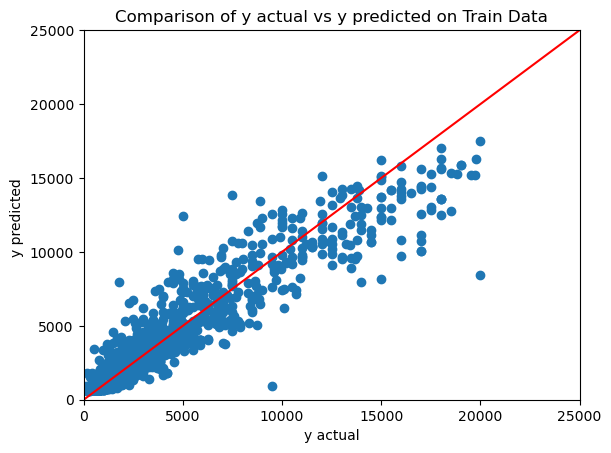

In [188]:
# Visualize
plt.scatter(y_train_clean/1e6, y_train_pred/1e6)

plt.plot([0, 25000], [0, 25000], c='red')
plt.xlim(0, 25000); plt.ylim(0, 25000)
plt.xlabel('y actual'); plt.ylabel('y predicted ')
plt.title('Comparison of y actual vs y predicted on Train Data')
plt.show()

In [189]:
# Predict
y_valid_pred = reg_best.predict(X_valid_clean)

In [190]:
# Find error
valid_error = rmse(y_valid, y_valid_pred)
print(f'RMSE on Valid data: {valid_error:.2f}')

RMSE on Valid data: 9480428663.90


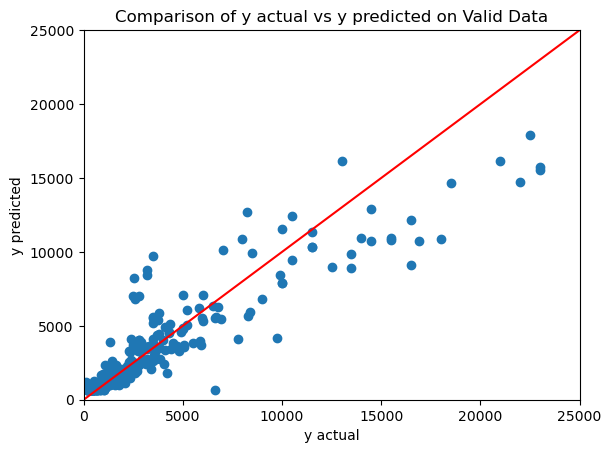

In [191]:
# Visualize
plt.scatter(y_valid/1e6, y_valid_pred/1e6)

plt.plot([0, 25000], [0, 25000], c='red')
plt.xlim(0, 25000); plt.ylim(0, 25000)
plt.xlabel('y actual'); plt.ylabel('y predicted')
plt.title('Comparison of y actual vs y predicted on Valid Data')
plt.show()

In [195]:
# Predict
y_test_pred = reg_best.predict(X_test_clean)

In [196]:
# Find error
valid_error = rmse(y_test, y_test_pred)
print(f'RMSE on Valid data: {valid_error:.2f}')

RMSE on Valid data: 4741229474.25


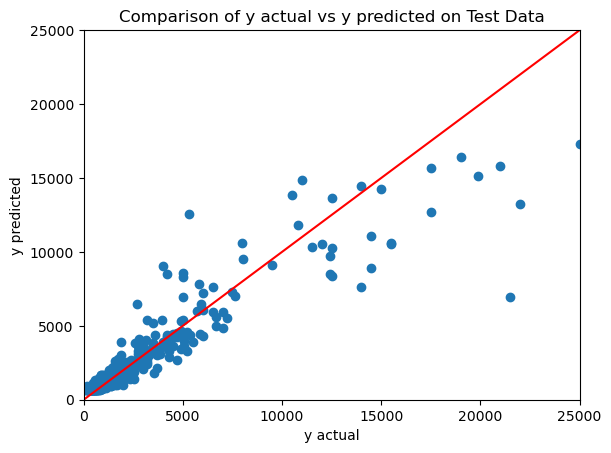

In [198]:
# Visualize
plt.scatter(y_test/1e6, y_test_pred/1e6)

plt.plot([0, 25000], [0, 25000], c='red')
plt.xlim(0, 25000); plt.ylim(0, 25000)
plt.xlabel('y actual'); plt.ylabel('y predicted')
plt.title('Comparison of y actual vs y predicted on Test Data')
plt.show()